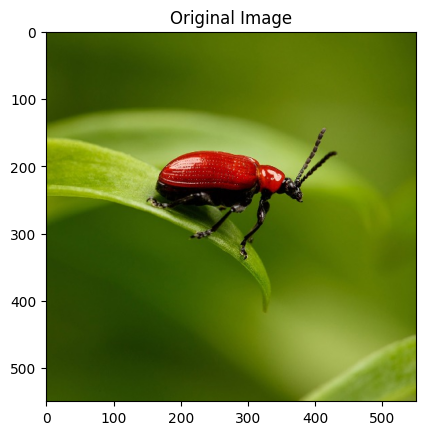

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("D:\OpenCV\Image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Original Image")
plt.show()

# HISTOGRAM

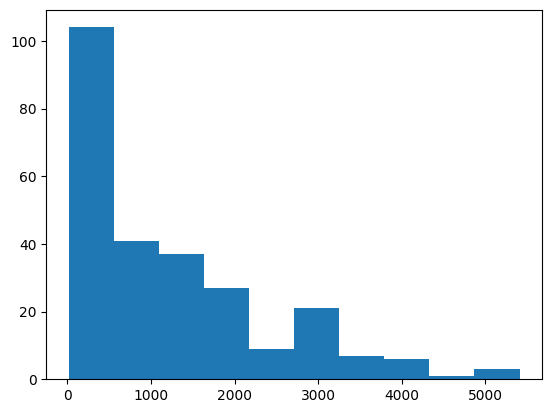

In [7]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.hist(hist)
plt.show()

# Translation

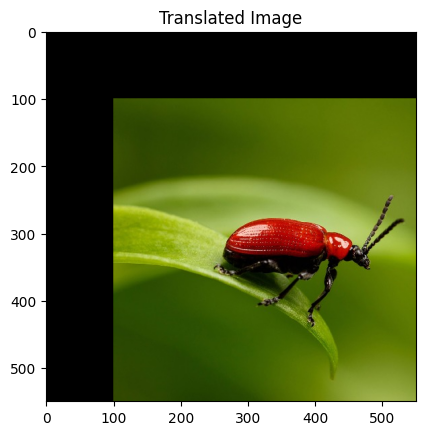

In [3]:
def Translation(img, Tx=0, Ty=0):
    TransMatrix = np.float32([[1,0,Tx],[0,1,Ty]])
    dims = (img.shape[1], img.shape[0])             
    
    return cv2.warpAffine(img, TransMatrix, dims)

translation = Translation(img, 100, 100)

plt.imshow(translation)
plt.title("Translated Image")
plt.show()

# Euclidean

[[  0.8660254  -0.5       200.       ]
 [  0.5         0.8660254 100.       ]
 [  0.          0.          1.       ]]


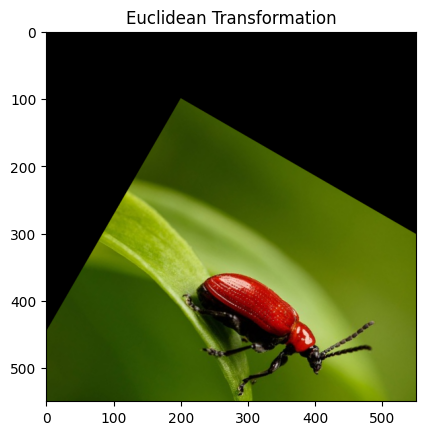

In [4]:
def EU(image, angle, Tx, Ty):
    Angle = angle * (np.pi/180)
    euMat = np.float32([[np.cos(Angle), -(np.sin(Angle)), Tx],
                        [np.sin(Angle), np.cos(Angle), Ty],
                        [0, 0, 1]])
    print(euMat)
    dims = (img.shape[1], img.shape[0])
    
    return cv2.warpPerspective(image, euMat, dims)

E = EU(img, 30, 200, 100)
plt.imshow(E)
plt.title("Euclidean Transformation")
plt.show()

# Similarity Transformation

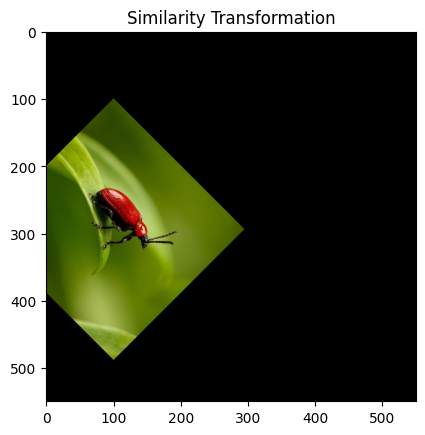

In [5]:
def Similarity(image, angle, Tx, Ty, scale_Factor):
    Angle = angle * (np.pi/180)
    similarMat = np.float32([[(np.cos(Angle))*scale_Factor, (-(np.sin(Angle)))*scale_Factor, Tx],
                             [(np.sin(Angle))*scale_Factor, (np.cos(Angle))*scale_Factor, Ty],
                             [0, 0, 1]])
    dims = (image.shape[1], image.shape[0])
    return cv2.warpPerspective(image, similarMat, dims)

S = Similarity(img, 45, 100, 100, 0.50)

plt.imshow(S)
plt.title("Similarity Transformation")
plt.show()


# Affine Transformation

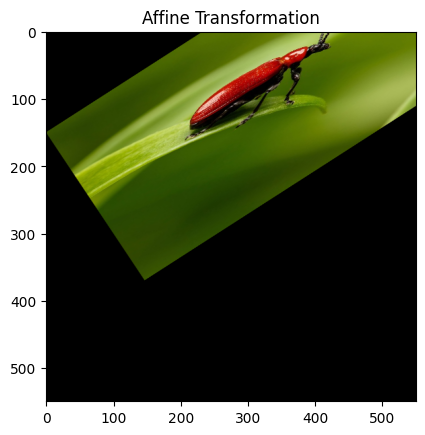

In [6]:
def affine(image):
    # src: Coordinates of quadrangle vertices in the source image. 
    # dst: Coordinates of the corresponding quadrangle vertices in the destination image.

    scr = np.float32([[0, 0],
                       [200, 50],
                       [50, 200]])
 
    dts = np.float32([[0, 150],
                       [200, 50],
                       [100, 200]])

    affineMat = cv2.getAffineTransform(scr, dts)
    dims = (image.shape[1], image.shape[0])
    return cv2.warpAffine(image, affineMat, dims)
cv2.resize()
A = affine(img)
plt.imshow(A)
plt.title("Affine Transformation")
plt.show()

# Projective Transformation

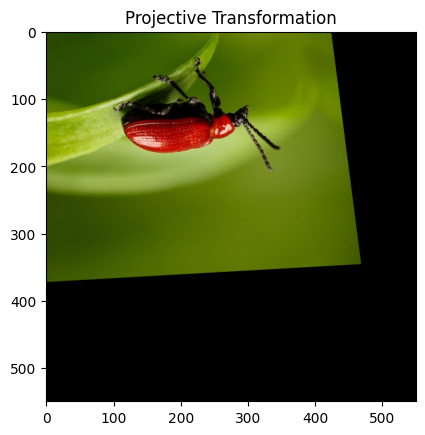

In [7]:
def project(image):
    src_points = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
#     dst_points = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
    dst_points = np.float32([[0, 300], [300, 300],[0, 0], [300, 0]])

    projectMat = cv2.getPerspectiveTransform(src_points, dst_points)
    dims = (int(image.shape[1]), int(image.shape[0]))
    return cv2.warpPerspective(image, projectMat, (dims))

P = project(img)
plt.imshow(P)
plt.title("Projective Transformation")
plt.show()